# Naive Bayes
Estimates the probability of an event occurring  
Fundamentally assumes features are independent

![Bayes Theorem](https://www.gstatic.com/education/formulas2/397133473/en/bayes__theorem.svg)

A, B = events  
P(A | B) = the probability of A given B  
P(B | A) = the probability of B given A  
P(A), P(B) = the probability of independent events  

## Example: Wrenches
Machine A: 30 wrenches / hour  
Machine B: 20 wrenches / hour

Out of all wrenches, 1% are defective  
Out of all defective wrenches, 50% came from Machine A and 50% came from Machine B

What is the probability that a defective wrench will be produced by Machine A?

![problem answer](https://lh5.googleusercontent.com/Nw2SrVfSHhVmS5wG5F5ShyVrIM7uE1vfk0NWPRnSiF43RaUkNkgsXEF4XJDMEWVFeVBgNCapMFkXkA=w1920-h913)

## Example: Driving vs Walking Dataset
![applying to datasets](https://lh5.googleusercontent.com/wvlh6_PjgUB8Dkhla0gtNSCLAMoGd86QvWECa3OjmBIv2pypsLy5gHrqaNqJVgmvd3hd5sUDbUAdEOx6arHD=w1920-h913)

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Import Dataset

In [3]:
dataset = pd.read_csv("datasets/social_network_ads.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Split Dataset

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=42)

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Create Model

In [7]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Make Predictions

In [10]:
y_pred = classifier.predict(X_test)

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), 1))

[[1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]]


In [12]:
classifier.predict(sc.transform([[ 30, 200000 ]]))

array([1], dtype=int64)

## Create Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[61  2]
 [ 5 32]]
0.93


## Visualize Results

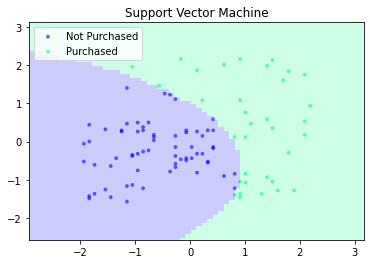

In [14]:
_X = X_test[:, 0]
_y = X_test[:, 1]

xmin, xmax = _X.min() - 1, _X.max() + 1
ymin, ymax = _y.min() - 1, _y.max() + 1

xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.1), np.arange(ymin, ymax, 0.1))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

df = pd.DataFrame({
    "x": _X.flatten(),
    "y": _y.flatten(),
    "colors": y_pred.flatten()
})

norm = plt.Normalize(0, 1)
cmap = plt.cm.winter

for i, dff in df.groupby("colors"):
    plt.scatter(dff["x"], dff["y"], c=cmap(norm(dff["colors"])), s=8, alpha=0.5, label="Not Purchased" if i == 0 else "Purchased")

plt.pcolormesh(xx, yy, Z, cmap=cmap, alpha=0.2)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Support Vector Machine")
plt.legend()

plt.show()
